In [ ]:
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Bangkit/WOWRACK/dataset/Person/Train'
val_dir = '/content/drive/MyDrive/Bangkit/WOWRACK/dataset/Person/Val'
test_dir = '/content/drive/MyDrive/Bangkit/WOWRACK/dataset/Person/Test'

In [ ]:
# # grader-required-cell

# print("Sample horse image:")
# plt.imshow(load_img(f"{os.path.join(train_dir, os.listdir(train_horses_dir)[0])}"))
# plt.show()

# print("\nSample human image:")
# plt.imshow(load_img(f"{os.path.join(val_dir, os.listdir(train_humans_dir)[0])}"))
# plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse', 
    shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    shuffle=True)

Found 1400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_function,
              optimizer=keras.optimizers.Adam(learning_rate=1e-6),
              metrics=['accuracy'])

NameError: ignored

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=150,
    validation_data=val_generator)

Epoch 1/150
88/88 [==============================] - 230s 3s/step - loss: 1.4227 - accuracy: 0.2500 - val_loss: 1.4044 - val_accuracy: 0.2475
Epoch 2/150
88/88 [==============================] - 13s 146ms/step - loss: 1.3926 - accuracy: 0.2621 - val_loss: 1.3828 - val_accuracy: 0.2675
Epoch 3/150
88/88 [==============================] - 15s 167ms/step - loss: 1.3727 - accuracy: 0.2821 - val_loss: 1.3627 - val_accuracy: 0.2975
Epoch 4/150
88/88 [==============================] - 14s 158ms/step - loss: 1.3593 - accuracy: 0.3057 - val_loss: 1.3544 - val_accuracy: 0.3450
Epoch 5/150
88/88 [==============================] - 13s 150ms/step - loss: 1.3486 - accuracy: 0.3893 - val_loss: 1.3445 - val_accuracy: 0.4525
Epoch 6/150
88/88 [==============================] - 13s 151ms/step - loss: 1.3378 - accuracy: 0.5171 - val_loss: 1.3319 - val_accuracy: 0.5475
Epoch 7/150
88/88 [==============================] - 13s 152ms/step - loss: 1.3296 - accuracy: 0.5364 - val_loss: 1.3229 - val_accuracy: 0

In [ ]:
epoch_avg_acc = sum(history.history['accuracy']) / len(history.history['accuracy'])
print("Epoch average accuracy: {:.2f}%".format(epoch_avg_acc * 100))

Epoch average accuracy: 90.82%


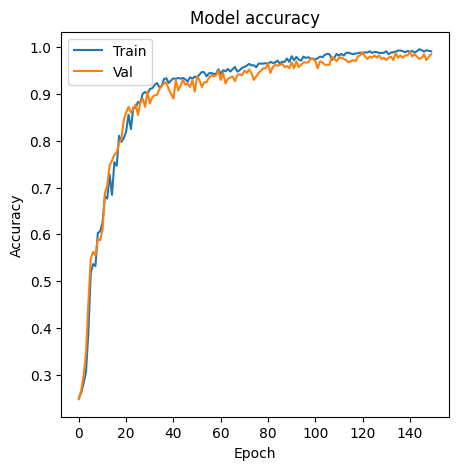

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

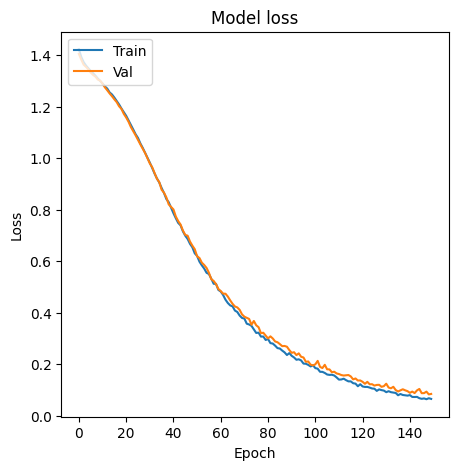

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(test_generator)

13/13 [==============================] - 29s 2s/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.19      0.20      0.19        50
     Class 2       0.30      0.30      0.30        50
     Class 3       0.24      0.22      0.23        50
     Class 4       0.26      0.26      0.26        50

    accuracy                           0.24       200
   macro avg       0.25      0.24      0.25       200
weighted avg       0.25      0.24      0.25       200



In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("test loss:",test_loss)
print("test acc:",test_accuracy)

13/13 [==============================] - 1s 72ms/step - loss: 0.0685 - accuracy: 0.9800
test loss: 0.0685330480337143
test acc: 0.9800000190734863


In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)

In [ ]:
cm

array([[10, 10, 17, 13],
       [17, 15,  6, 12],
       [12, 15, 11, 12],
       [15, 10, 12, 13]])

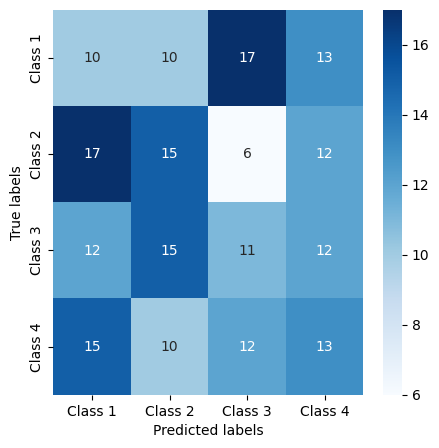

In [ ]:
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)
plt.show()

In [ ]:
# test model

1/1 [==============================] - 0s 350ms/step
Predicted Class: 1


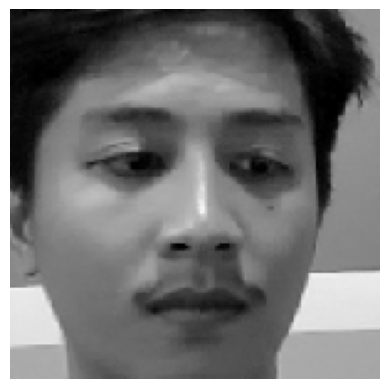

In [ ]:
import numpy as np

# Path ke file yang akan diuji
file_path = "/content/drive/MyDrive/Bangkit/WOWRACK/dataset/Person/Test/2/1_Sample2_13.jpg"

# Membaca dan memproses gambar
img = tf.keras.preprocessing.image.load_img(file_path, target_size=(150, 150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi

# Melakukan prediksi
predictions = model.predict(x)

# Mendapatkan label kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions[0])

plt.imshow(img)
plt.axis('off')
# Menampilkan hasil prediksi
print("Predicted Class:", predicted_class)
plt.show()

Konvert Model kedalam bentuk tensorflow JS

In [ ]:
!pip install tensorflowjs



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

2023-05-20 17:25:50.033148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# Simpan model yang telah dilatih sebagai file Keras HDF5.
saved_model_path = "./my_person_model.h5"
model.save(saved_model_path)

# Konversi model Keras HDF5 ke format TensorFlow.js.
!tensorflowjs_converter --input_format=keras {saved_model_path} /tmp/tfjs_model

2023-05-20 17:28:11.135657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import tensorflow.keras as keras
import tensorflowjs as tfjs
path = '/content/my_person_model.h5'
model = keras.models.load_model(path)
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Bangkit/WOWRACK/dataset/Person')

